import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 


In [5]:
df_original = pd.read_csv(r"D:\dataset 2024\used cars dataset\train-data.csv")

In [6]:
df = df_original.copy()

Data analysis & exploration

In [7]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [9]:
df = df.drop(["Unnamed: 0","New_Price"],axis=1)

In [10]:
df["Brand"] = df["Name"].apply(lambda z: z.split()[0])
df["Model"] = df["Name"].apply(lambda z: z.split()[1])

In [11]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4


In [12]:
df["Model"].value_counts()

Model
Swift         353
City          270
i20           247
Verna         170
Innova        164
             ... 
Beetle          1
Petra           1
Tiguan          1
Countryman      1
F               1
Name: count, Length: 212, dtype: int64

In [13]:
def mileage_convert(x):
    if type(x) ==str:
        if x.split()[-1] == "km/kg":
            return float(x.split()[0]) * 1.40
        elif x.split()[-1] =="kmpl":
            return float(x.split()[0])
    else:
        return np.nan



def Engine_convert(z):
    if type(z) == str:
        if z.split()[-1] =="CC":
            return float(z.split()[0])
    else:
        return np.nan

def Power_convert(z):
    if type(z) == str:
        if z.split()[-1] == "bhp":
            return z.split()[0]
    else:
        return np.nan



df["Mileage/Liter"] = df["Mileage"].apply(mileage_convert)

df["Engine_capacity"] = df["Engine"].apply(Engine_convert)

df["Power_capacity"] = df["Power"].apply(Power_convert)



In [14]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Mileage/Liter,Engine_capacity,Power_capacity
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon,37.24,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta,19.67,1582.0,126.2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz,18.20,1199.0,88.7
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4,15.20,1968.0,140.8


In [15]:
df["Power_capacity"] = pd.to_numeric(df["Power_capacity"],errors = "coerce")

df["Price"] = df["Price"] * 1193.15
df = df.drop(["Name","Mileage","Engine","Power"],axis=1)
df["Age"] = 2020 - df["Year"]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Seats              5977 non-null   float64
 7   Price              6019 non-null   float64
 8   Brand              6019 non-null   object 
 9   Model              6019 non-null   object 
 10  Mileage/Liter      6017 non-null   float64
 11  Engine_capacity    5983 non-null   float64
 12  Power_capacity     5876 non-null   float64
 13  Age                6019 non-null   int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 658.5+ KB


In [17]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage/Liter,Engine_capacity,Power_capacity,Age
0,Mumbai,2010,72000,CNG,Manual,First,5.0,2088.0125,Maruti,Wagon,37.24,998.0,58.16,10
1,Pune,2015,41000,Diesel,Manual,First,5.0,14914.3750,Hyundai,Creta,19.67,1582.0,126.20,5
2,Chennai,2011,46000,Petrol,Manual,First,5.0,5369.1750,Honda,Jazz,18.20,1199.0,88.70,9
3,Chennai,2012,87000,Diesel,Manual,First,7.0,7158.9000,Maruti,Ertiga,20.77,1248.0,88.76,8
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,21166.4810,Audi,A4,15.20,1968.0,140.80,7


In [18]:
df = df.drop(["Year"],axis=1)

In [19]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage/Liter,Engine_capacity,Power_capacity,Age
0,Mumbai,72000,CNG,Manual,First,5.0,2088.0125,Maruti,Wagon,37.24,998.0,58.16,10
1,Pune,41000,Diesel,Manual,First,5.0,14914.3750,Hyundai,Creta,19.67,1582.0,126.20,5
2,Chennai,46000,Petrol,Manual,First,5.0,5369.1750,Honda,Jazz,18.20,1199.0,88.70,9
3,Chennai,87000,Diesel,Manual,First,7.0,7158.9000,Maruti,Ertiga,20.77,1248.0,88.76,8
4,Coimbatore,40670,Diesel,Automatic,Second,5.0,21166.4810,Audi,A4,15.20,1968.0,140.80,7


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Kilometers_Driven  6019 non-null   int64  
 2   Fuel_Type          6019 non-null   object 
 3   Transmission       6019 non-null   object 
 4   Owner_Type         6019 non-null   object 
 5   Seats              5977 non-null   float64
 6   Price              6019 non-null   float64
 7   Brand              6019 non-null   object 
 8   Model              6019 non-null   object 
 9   Mileage/Liter      6017 non-null   float64
 10  Engine_capacity    5983 non-null   float64
 11  Power_capacity     5876 non-null   float64
 12  Age                6019 non-null   int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 611.4+ KB


In [21]:
df["Seats"].value_counts()

Seats
5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: count, dtype: int64

In [22]:
df.min()

Location              Ahmedabad
Kilometers_Driven           171
Fuel_Type                   CNG
Transmission          Automatic
Owner_Type                First
Seats                       0.0
Price                   524.986
Brand                Ambassador
Model                         1
Mileage/Liter               0.0
Engine_capacity            72.0
Power_capacity             34.2
Age                           1
dtype: object

In [23]:
#df = df[df["Seats"] != 0.0]

df["Seats"] = df["Seats"].astype("object")

In [24]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage/Liter,Engine_capacity,Power_capacity,Age
0,Mumbai,72000,CNG,Manual,First,5.0,2088.0125,Maruti,Wagon,37.24,998.0,58.16,10
1,Pune,41000,Diesel,Manual,First,5.0,14914.3750,Hyundai,Creta,19.67,1582.0,126.20,5
2,Chennai,46000,Petrol,Manual,First,5.0,5369.1750,Honda,Jazz,18.20,1199.0,88.70,9
3,Chennai,87000,Diesel,Manual,First,7.0,7158.9000,Maruti,Ertiga,20.77,1248.0,88.76,8
4,Coimbatore,40670,Diesel,Automatic,Second,5.0,21166.4810,Audi,A4,15.20,1968.0,140.80,7


In [25]:
num_cols = df.select_dtypes(exclude = "O").columns
cat_cols = df.select_dtypes(include = "O").columns

In [26]:
num_cols

Index(['Kilometers_Driven', 'Price', 'Mileage/Liter', 'Engine_capacity',
       'Power_capacity', 'Age'],
      dtype='object')

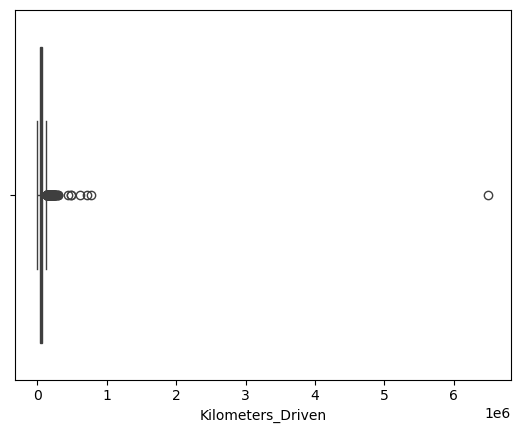

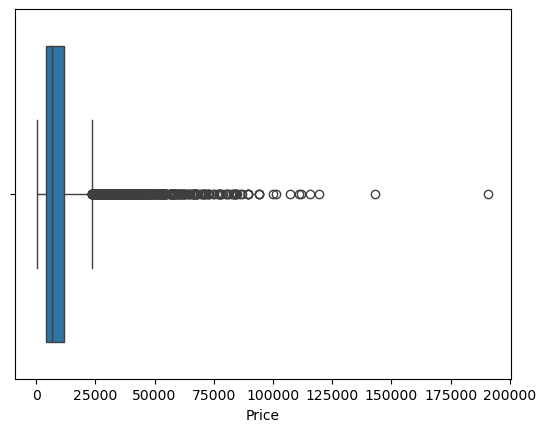

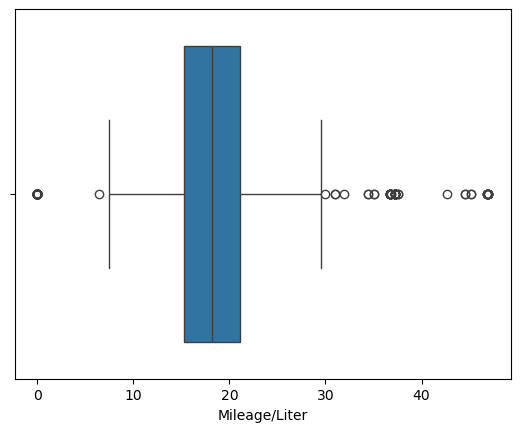

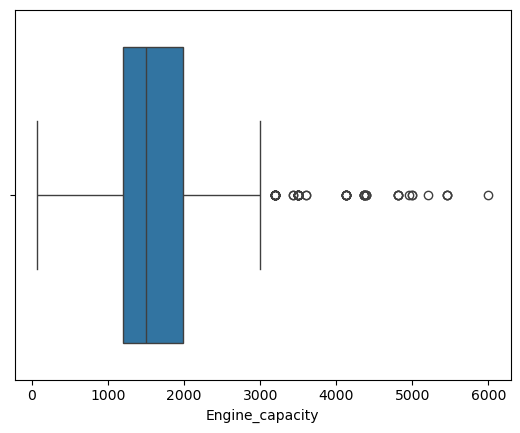

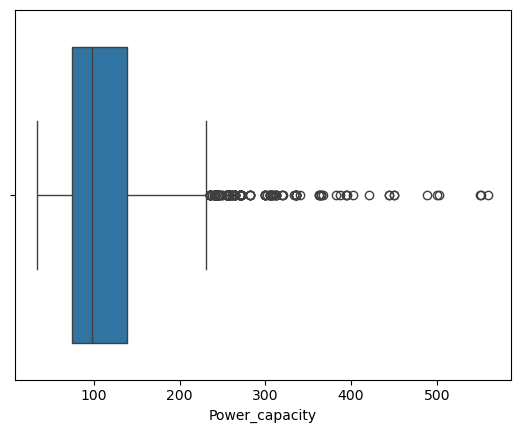

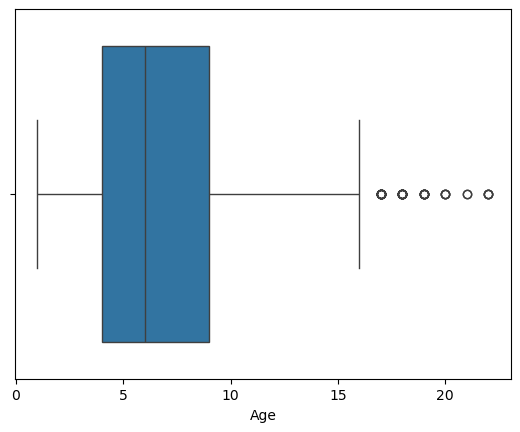

In [27]:
for col in num_cols:
    sns.boxplot(data = df , x = col)
    plt.show()

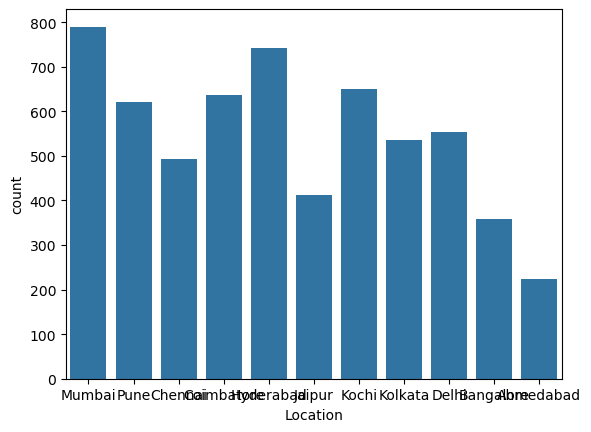

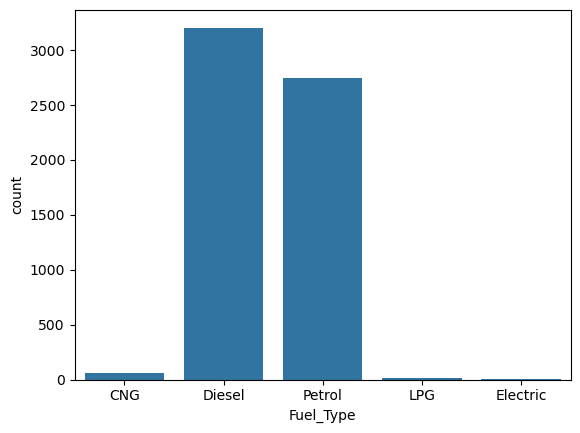

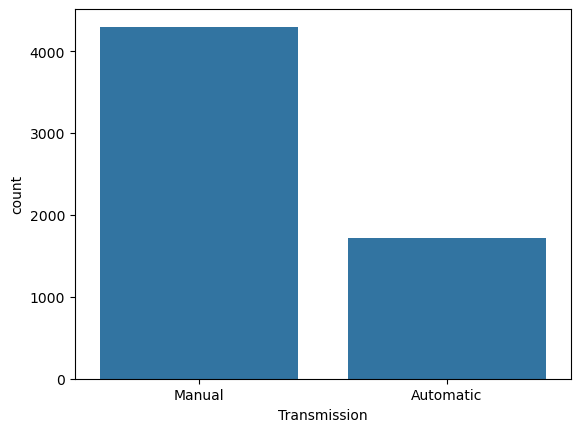

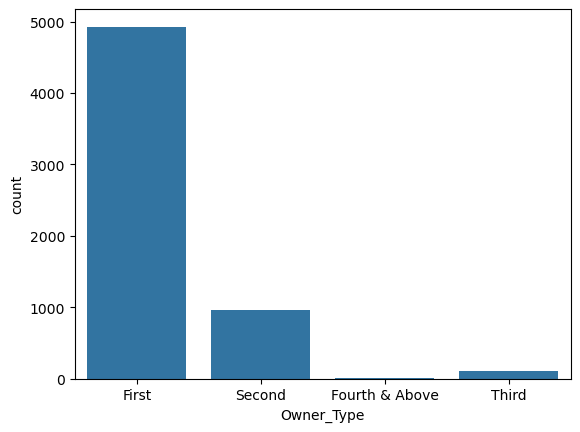

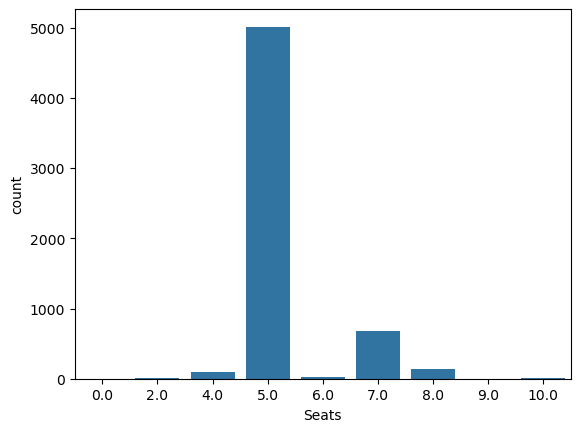

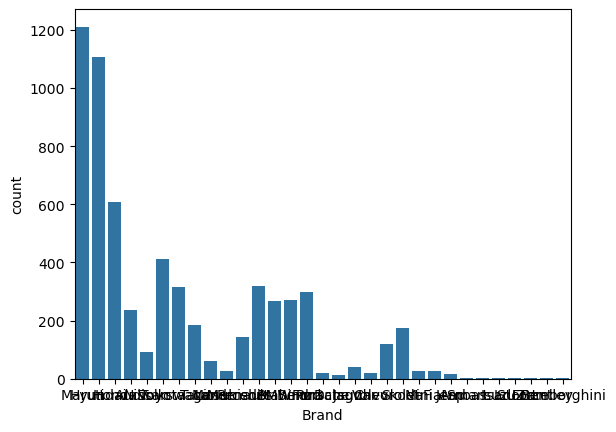

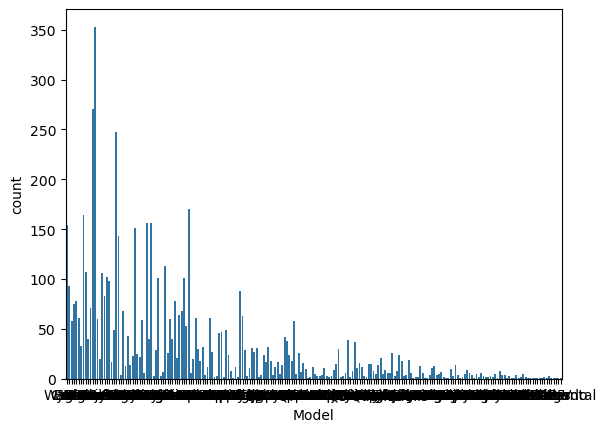

In [28]:
for col in cat_cols:
    sns.countplot(data = df , x = col)
    plt.show()

In [29]:
df.min()

Location              Ahmedabad
Kilometers_Driven           171
Fuel_Type                   CNG
Transmission          Automatic
Owner_Type                First
Seats                       0.0
Price                   524.986
Brand                Ambassador
Model                         1
Mileage/Liter               0.0
Engine_capacity            72.0
Power_capacity             34.2
Age                           1
dtype: object

In [30]:
df["Price"].min()

524.986

In [31]:
df["Price"].max()

190904.0

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Kilometers_Driven  6019 non-null   int64  
 2   Fuel_Type          6019 non-null   object 
 3   Transmission       6019 non-null   object 
 4   Owner_Type         6019 non-null   object 
 5   Seats              5977 non-null   object 
 6   Price              6019 non-null   float64
 7   Brand              6019 non-null   object 
 8   Model              6019 non-null   object 
 9   Mileage/Liter      6017 non-null   float64
 10  Engine_capacity    5983 non-null   float64
 11  Power_capacity     5876 non-null   float64
 12  Age                6019 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 611.4+ KB


In [33]:
def outlier_handling(x, p1=0.25, p2=0.75):
    q1 = x.quantile(p1)
    q3 = x.quantile(p2)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    # Return original values if they are within limits; else return NaN
    return x.where((x >= min_limit) & (x <= max_limit), other=np.nan)

for col in ["Engine_capacity","Power_capacity","Mileage/Liter","Kilometers_Driven","Age"]: #exclude y column
    df[col] = outlier_handling(df[col])
    

In [34]:
df["Price"].isnull().sum()

0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Kilometers_Driven  5817 non-null   float64
 2   Fuel_Type          6019 non-null   object 
 3   Transmission       6019 non-null   object 
 4   Owner_Type         6019 non-null   object 
 5   Seats              5977 non-null   object 
 6   Price              6019 non-null   float64
 7   Brand              6019 non-null   object 
 8   Model              6019 non-null   object 
 9   Mileage/Liter      5901 non-null   float64
 10  Engine_capacity    5922 non-null   float64
 11  Power_capacity     5638 non-null   float64
 12  Age                5969 non-null   float64
dtypes: float64(6), object(7)
memory usage: 611.4+ KB


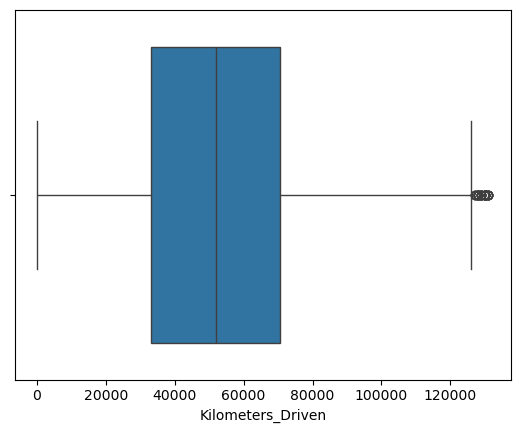

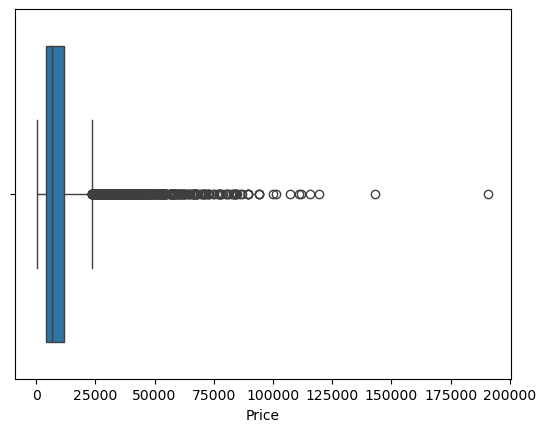

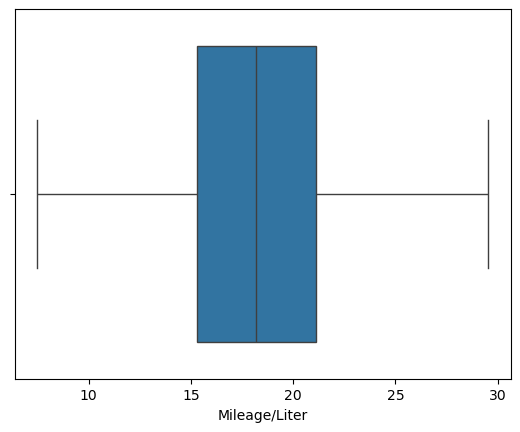

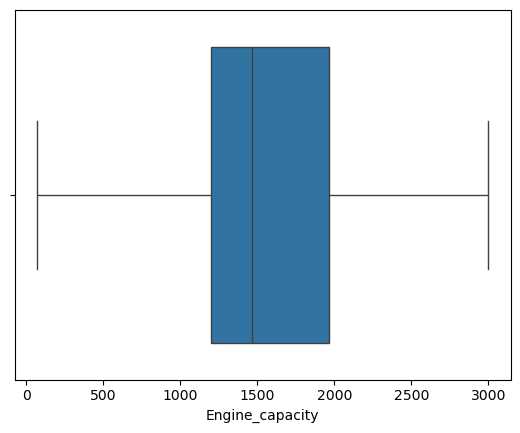

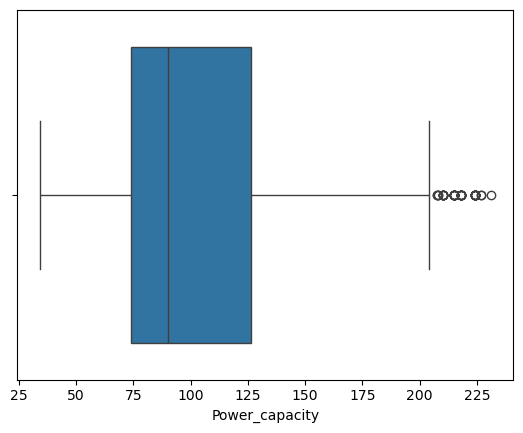

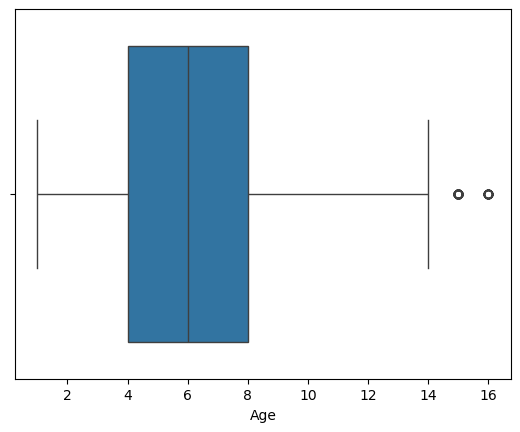

In [36]:
for col in num_cols:
    sns.boxplot(data = df , x = col)
    plt.show()

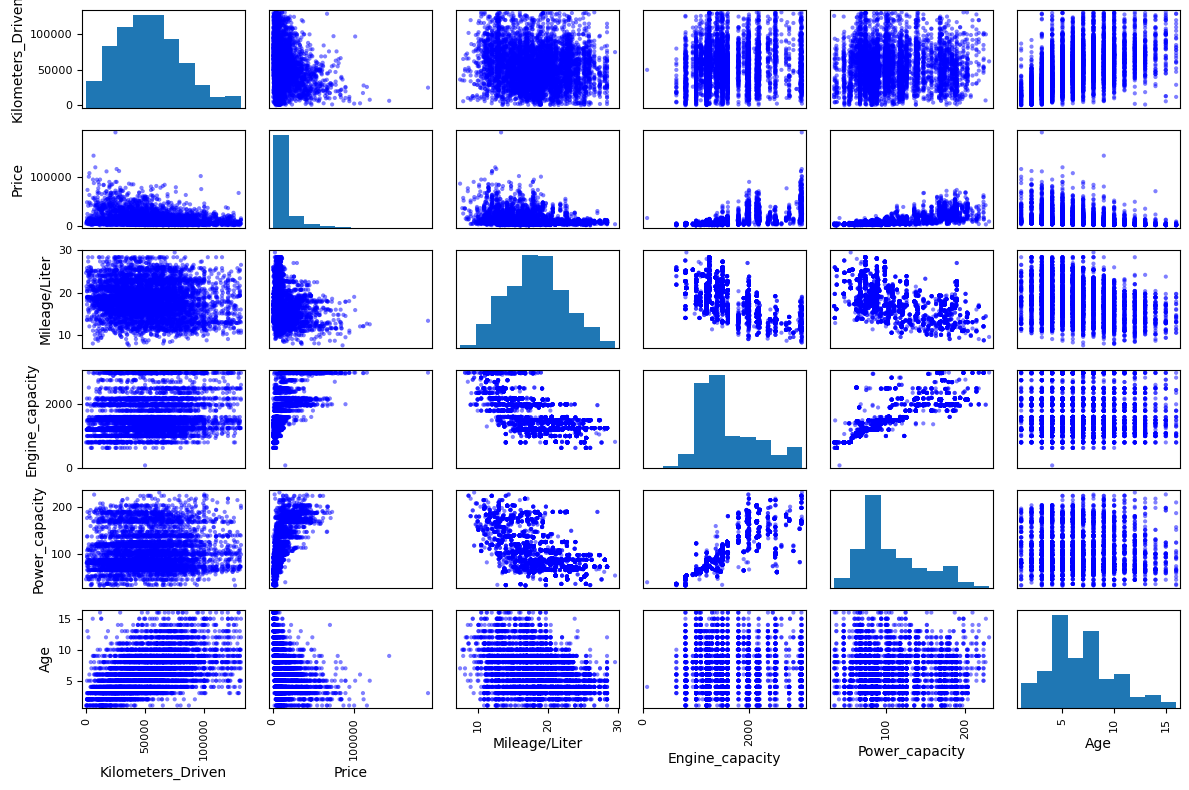

In [37]:
from pandas.plotting import scatter_matrix

# Assuming df contains only numeric columns or that you have selected the numeric columns
scatter_matrix(df[num_cols], figsize=(12, 8), color='b')
plt.tight_layout()
plt.show()


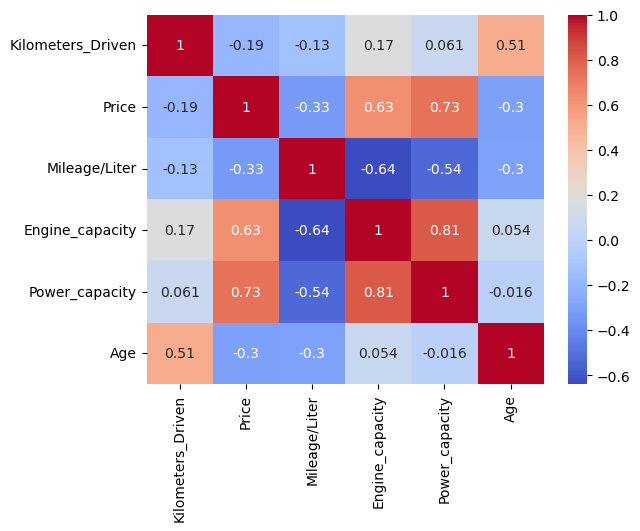

In [38]:
corr_matrix = df[num_cols].corr()
sns.heatmap(data = corr_matrix , annot = True , cmap = "coolwarm")
plt.show()

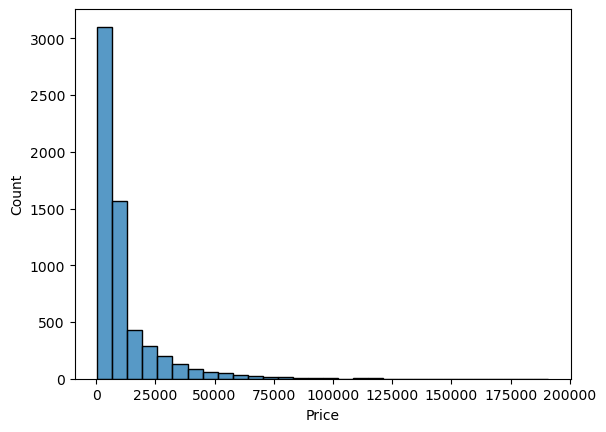

In [39]:
sns.histplot(data = df, x = df["Price"],bins = 30)
plt.show()

In [40]:
df["Price"]= np.log(df["Price"])

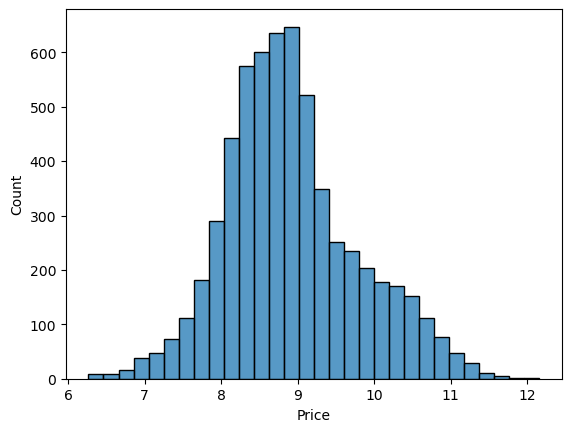

In [41]:
sns.histplot(data = df, x = df["Price"],bins = 30)
plt.show()

In [42]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage/Liter,Engine_capacity,Power_capacity,Age
0,Mumbai,72000.0,CNG,Manual,First,5.0,7.643968,Maruti,Wagon,NaN,998.0,58.16,10.0
1,Pune,41000.0,Diesel,Manual,First,5.0,9.610081,Hyundai,Creta,19.67,1582.0,126.20,5.0
2,Chennai,46000.0,Petrol,Manual,First,5.0,8.588430,Honda,Jazz,18.20,1199.0,88.70,9.0
3,Chennai,87000.0,Diesel,Manual,First,7.0,8.876112,Maruti,Ertiga,20.77,1248.0,88.76,8.0
4,Coimbatore,40670.0,Diesel,Automatic,Second,5.0,9.960174,Audi,A4,15.20,1968.0,140.80,7.0


In [43]:
df["Price"].isnull().sum()

0

Model Preprocessing & creation

In [44]:
x = df.drop(["Price"],axis=1)
y = df["Price"]

In [45]:
y.isnull().sum()

0

In [46]:
num_cols=  x.select_dtypes(exclude = "object").columns.tolist()
nominal_cols = df[["Fuel_Type","Location","Transmission","Model"]].columns.tolist()
ordinal_cols = df[["Owner_Type","Seats"]].columns.tolist()

In [47]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0 , test_size = .2)

In [48]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler,OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline


num_pipeline = Pipeline([("imputer",SimpleImputer(strategy = "median")),
                         ("poly", PolynomialFeatures(include_bias = False)),
                         ("scaler",StandardScaler())
                        ])

ordinal_pipeline = Pipeline([("imputer", SimpleImputer(strategy = "most_frequent")),
                             ("encoder",OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = -1))
                            ])
nominal_pipeline = Pipeline([("imputer",SimpleImputer(strategy = "most_frequent")),
                         ("encoder",OneHotEncoder(drop = "first",sparse_output = False,handle_unknown = "ignore"))
                        ])

preprocessor = ColumnTransformer([
    ("num_pipeline",num_pipeline,num_cols),
    ("ordinal_pipeline",ordinal_pipeline,ordinal_cols),
     ("nominal_pipeline",nominal_pipeline,nominal_cols)
])


In [49]:
x_train_prep = preprocessor .fit_transform(x_train)
x_test_prep = preprocessor.transform(x_test)


C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [50]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression


ridge= Pipeline([
    ("preprocessor", preprocessor),
    ("model",Ridge())])

params = {"preprocessor__num_pipeline__poly__degree":[1,2,3,4,5],
          "model__alpha":[10,20,30,35,40]
          }


grid = GridSearchCV(ridge,params,cv = 3 , scoring = "r2")
grid.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Kilometers_Driven',
                                                                          'Mileage/Liter',
                                                                          'Engine_capacity',
                                                                          'Power_capacity',
                                                                          'Age']),
                                                                        ('ordinal_pipeline',
                                                                         Pip...
                                                                        ('nominal_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Fuel_Type',
                                                                          'Location',
                                                                          'Transmission',
                                                                          'Model'])])),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [10, 20, 30, 35, 40],
                         'preprocessor__num_pipeline__poly__degree': [1, 2, 3,
                                                                      4, 5]},
             scoring='r2')

In [52]:
grid.best_score_

0.8959490047117397

In [53]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_preprocessor__num_pipeline__poly__degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033614,8.947024e-03,0.015974,4.941897e-04,10,1,"{'model__alpha': 10, 'preprocessor__num_pipeli...",0.888489,0.875968,0.877958,0.880805,0.005494,9
1,0.031243,1.123916e-07,0.015623,1.920548e-06,10,2,"{'model__alpha': 10, 'preprocessor__num_pipeli...",0.901389,0.887758,0.888307,0.892485,0.006300,4
2,0.041660,7.361650e-03,0.015617,3.505825e-06,10,3,"{'model__alpha': 10, 'preprocessor__num_pipeli...",0.903690,0.889818,0.890257,0.894588,0.006438,3
3,0.046869,1.083865e-06,0.015618,1.408263e-06,10,4,"{'model__alpha': 10, 'preprocessor__num_pipeli...",0.903925,0.890170,0.890244,0.894780,0.006467,2
4,0.065198,3.826766e-03,0.015740,1.766397e-04,10,5,"{'model__alpha': 10, 'preprocessor__num_pipeli...",0.905203,0.890854,0.891790,0.895949,0.006555,1
5,0.031875,4.549720e-04,0.020390,9.521280e-03,20,1,"{'model__alpha': 20, 'preprocessor__num_pipeli...",0.876642,0.863898,0.867206,0.869249,0.005400,21
6,0.036451,7.365808e-03,0.015620,2.044786e-06,20,2,"{'model__alpha': 20, 'preprocessor__num_pipeli...",0.890047,0.875556,0.878220,0.881274,0.006298,8
7,0.046865,1.275679e-02,0.015620,1.173403e-06,20,3,"{'model__alpha': 20, 'preprocessor__num_pipeli...",0.893978,0.878694,0.881809,0.884827,0.006594,7
8,0.046863,1.573482e-06,0.015622,3.311263e-06,20,4,"{'model__alpha': 20, 'preprocessor__num_pipeli...",0.894251,0.878959,0.881620,0.884943,0.006671,6
9,0.059644,9.489933e-03,0.020829,7.363392e-03,20,5,"{'model__alpha': 20, 'preprocessor__num_pipeli...",0.895455,0.879611,0.882710,0.885925,0.006856,5
